In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

# Sample dataset
data = pd.DataFrame({
    'Province': ['C', 'A', 'C', 'B', 'B', 'A', 'C', 'A'],
    'Zipcode': [1003, 1003, 1004, 1005, 1005, 1003, 1004, 1003],
    'Gender': ['Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male'],
    'Total_Claim': [652.74, 1159.38, 834.50, 700.22, 980.45, 1100.67, 870.89, 990.34],
    'Premium': [898.49, 1040.56, 950.23, 880.45, 1010.32, 1120.78, 940.56, 995.23]
})


In [3]:
# Task 3: A/B Hypothesis Testing

# Null Hypotheses:
# H1: There are no risk differences across provinces.
# H2: There are no risk differences between zip codes.
# H3: There are no significant margin (profit) differences between zip codes.
# H4: There are no significant risk differences between Women and Men.

In [4]:
# Selecting Metrics
kpi = 'Total_Claim'  # Key performance indicator

In [5]:
# Data Segmentation
# Grouping for H1: Provinces
province_groups = data.groupby('Province')[kpi]

In [6]:
# Grouping for H2: Zip Codes
zipcode_groups = data.groupby('Zipcode')[kpi]

In [7]:
# Grouping for H3: Profit (Premium - Total Claim)
data['Profit'] = data['Premium'] - data['Total_Claim']
profit_groups = data.groupby('Zipcode')['Profit']

In [8]:
# Grouping for H4: Gender
gender_groups = data.groupby('Gender')[kpi]

In [9]:
# Statistical Testing
# H1: Risk differences across provinces (ANOVA or t-tests)
province_values = [province_groups.get_group(group) for group in province_groups.groups]
anova_provinces = ttest_ind(*province_values[:2])  # For simplicity, comparing two groups

In [10]:
# H2: Risk differences across zip codes
zipcode_values = [zipcode_groups.get_group(group) for group in zipcode_groups.groups]
anova_zipcodes = ttest_ind(*zipcode_values[:2])  # For simplicity, comparing two groups

In [11]:
# H3: Profit differences across zip codes
profit_values = [profit_groups.get_group(group) for group in profit_groups.groups]
anova_profit = ttest_ind(*profit_values[:2])  # For simplicity, comparing two groups

In [12]:
# H4: Risk differences between Women and Men
gender_values = [gender_groups.get_group(group) for group in gender_groups.groups]
ttest_gender = ttest_ind(*gender_values)

In [13]:
# Results
print("\n--- Hypothesis Testing Results ---")
print(f"H1 (Provinces): p-value = {anova_provinces.pvalue}")
print(f"H2 (Zip Codes): p-value = {anova_zipcodes.pvalue}")
print(f"H3 (Profit): p-value = {anova_profit.pvalue}")
print(f"H4 (Gender): p-value = {ttest_gender.pvalue}")


--- Hypothesis Testing Results ---
H1 (Provinces): p-value = 0.14133962281431714
H2 (Zip Codes): p-value = 0.5096384555158759
H3 (Profit): p-value = 0.6583631429870114
H4 (Gender): p-value = 0.3427825539069718


In [14]:
# Analyze and Report
if anova_provinces.pvalue < 0.05:
    print("Reject H1: There are significant risk differences across provinces.")
else:
    print("Fail to Reject H1: No significant risk differences across provinces.")

if anova_zipcodes.pvalue < 0.05:
    print("Reject H2: There are significant risk differences between zip codes.")
else:
    print("Fail to Reject H2: No significant risk differences between zip codes.")

if anova_profit.pvalue < 0.05:
    print("Reject H3: There are significant margin differences between zip codes.")
else:
    print("Fail to Reject H3: No significant margin differences between zip codes.")

if ttest_gender.pvalue < 0.05:
    print("Reject H4: There are significant risk differences between Women and Men.")
else:
    print("Fail to Reject H4: No significant risk differences between Women and Men.")

Fail to Reject H1: No significant risk differences across provinces.
Fail to Reject H2: No significant risk differences between zip codes.
Fail to Reject H3: No significant margin differences between zip codes.
Fail to Reject H4: No significant risk differences between Women and Men.


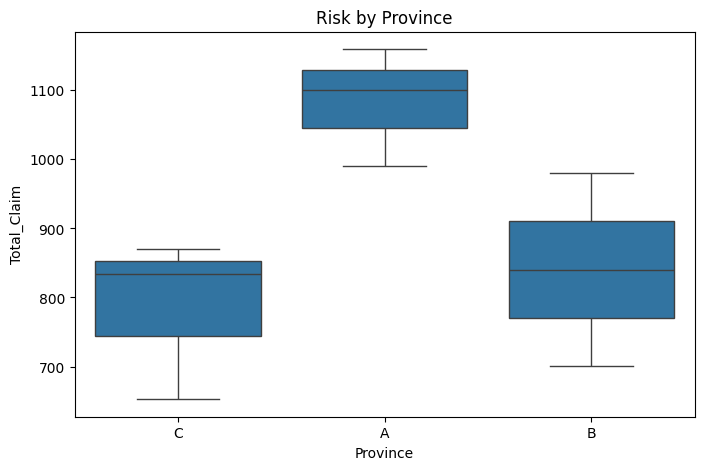

In [15]:
# Visualization of Findings
# Risk by Province
plt.figure(figsize=(8, 5))
sns.boxplot(x='Province', y=kpi, data=data)
plt.title('Risk by Province')
plt.show()

C:\Users\ufanc\AppData\Local\Temp\ipykernel_26456\1871543660.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Province', y=kpi, data=data, ci="sd")  # ci="sd" adds error bars


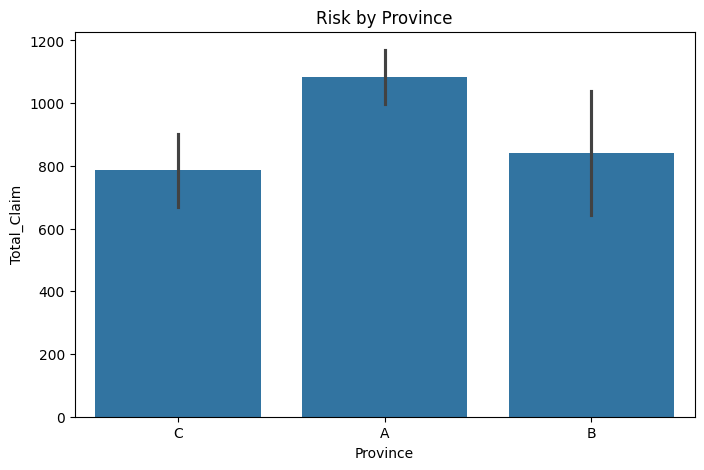

In [16]:
# Risk by Province (Bar Plot)
plt.figure(figsize=(8, 5))
sns.barplot(x='Province', y=kpi, data=data, ci="sd")  # ci="sd" adds error bars
plt.title('Risk by Province')
plt.show()

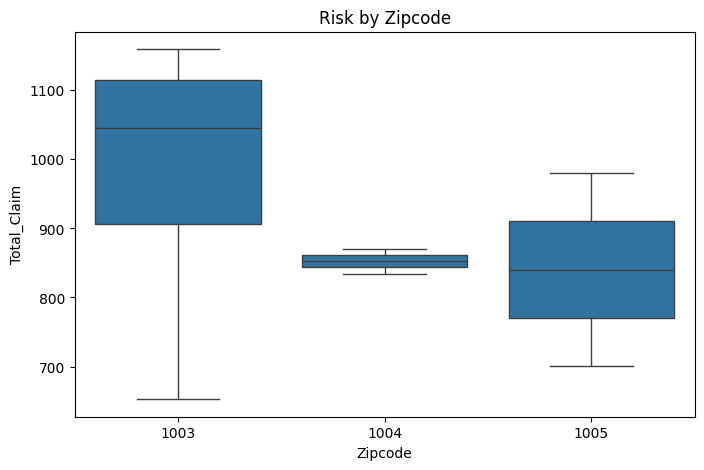

In [17]:
# Risk by Zipcode
plt.figure(figsize=(8, 5))
sns.boxplot(x='Zipcode', y=kpi, data=data)
plt.title('Risk by Zipcode')
plt.show()

C:\Users\ufanc\AppData\Local\Temp\ipykernel_26456\2167638554.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Zipcode', y='Profit', data=data, ci=None)


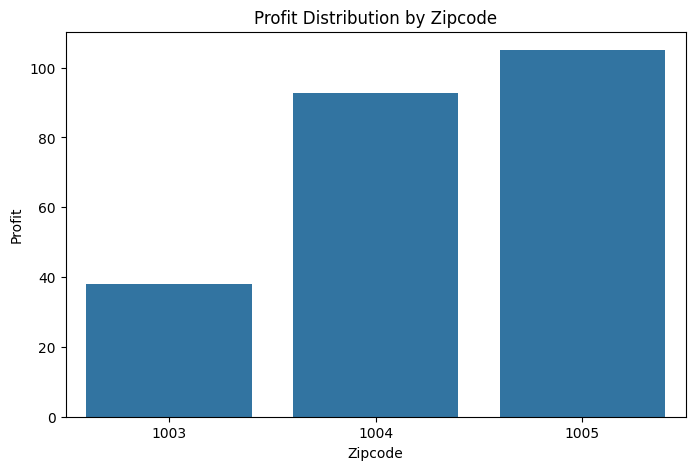

In [18]:
# Profit Distribution by Zipcode
plt.figure(figsize=(8, 5))
sns.barplot(x='Zipcode', y='Profit', data=data, ci=None)
plt.title('Profit Distribution by Zipcode')
plt.show()

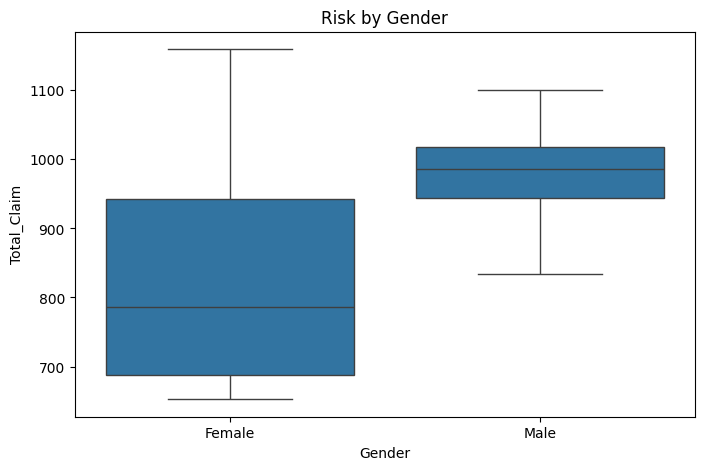

In [19]:
# Gender Risk Comparison
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y=kpi, data=data)
plt.title('Risk by Gender')
plt.show()